# Setup
## Constants

In [1]:
!pip install transformers -q
!pip install torch -q
!pip install torchvision -q

In [2]:
# False if you have already created and saved a .pth file to PTH_SAVE_PATH
CREATE_NEW_DATASET = True

# train, test, val set size. Should sum to 1
SET_SIZES = {
    "train": 0.8,
    "test": 0.1,
    "val": 0.1,
}

# samples per class in uniform dataset
N_SAMPLES = 400

# path to dataset (do not change)
HM_DATA_PATH = "../dataset/"

# path to pth saves (do not change)
PTH_SAVE_PATH = "../pth/"

## Imports

In [3]:
import os, sys, random, importlib, transformers, itertools, copy
import numpy as np, torch.nn as nn, torch, seaborn as sns, matplotlib.pyplot as plt, pandas as pd
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
from torch.utils.data import DataLoader
print(os.getcwd())# Our own files
# sys.path.append('./src/')
import model_functions, utils, training, datasets
def set_seed(seed):# reproducable
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
set_seed(0)

/home/jupyter/DD2430_Project/src


In [4]:
def update():# if you change our files
    import model_functions, utils, training, datasets
    for lib in [model_functions, utils, training, datasets]:
        importlib.reload(lib)# issues with not updating
update()

In [5]:
device = 'cpu'
if torch.cuda.is_available():
    device = 'cuda'
elif torch.backends.mps.is_available(): # For apple silicon
    device = 'mps'
print("Using device:", device)

Using device: cuda


In [6]:
model = transformers.CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = transformers.CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
processor.feature_extractor.do_rescale = False # make sure image values: False=> [0-1] and True=> [0,255]

/opt/conda/envs/pytorch/lib/python3.10/site-packages/transformers/models/clip/processing_clip.py:149: FutureWarning: `feature_extractor` is deprecated and will be removed in v5. Use `image_processor` instead.
  warnings.warn(


# Dataset

### Full dataset, run once

In [7]:
df = pd.read_csv(HM_DATA_PATH+'articles_filtered.csv')
embs = torch.load(HM_DATA_PATH+'embedds.pth', weights_only=True) # all 100k embeddings
labs = torch.load(HM_DATA_PATH+'labels.pth', weights_only=True).tolist() #  100k labels
hmd = datasets.HMDatasetDuplicates(embs, np.array(labs), df)
print(hmd.article_id2suclass(694805002, 'garment_group_name'))
#print(hmd.list_article_id2suclass(labs, 'garment_group_name'))#all
print(len(labs))
BALANCED = False

Knitwear
105099


In [9]:
update()
set_sizes = {"train": 0.8, "val": 0.1}
data = datasets.datasets(embs, np.array(labs), df, set_sizes, True)# takes 3 min

47071 Train size: 37656, Val size: 4707, Test size: 4708
105099
This should be empty set() set()
The resulting sizes 84230 4707 4708


### Subsets

In [10]:
update()
exclude_classes = ['Special Offers', 'Woven/Jersey/Knitted mix Baby','Unknown']
dataloaders_imbalanced = datasets.get_dataloaders('garment_group_name', data, 1500, exclude_classes, 128)# look at Resource Utilization to see if capping

100%|██████████| 84230/84230 [00:38<00:00, 2206.22it/s]


Final class count for train: {'Dressed': 694, 'Dresses/Skirts girls': 1169, 'Trousers': 1500, 'Outdoor': 1500, 'Under-, Nightwear': 1500, 'Shorts': 1272, 'Jersey Fancy': 1500, 'Shoes': 1500, 'Skirts': 986, 'Dresses Ladies': 1500, 'Knitwear': 1500, 'Trousers Denim': 1500, 'Shirts': 1500, 'Blouses': 1500, 'Swimwear': 1500, 'Jersey Basic': 1500, 'Accessories': 1500, 'Socks and Tights': 1500}


100%|██████████| 4707/4707 [00:02<00:00, 2289.12it/s]


Final class count for val: {'Dressed': 55, 'Dresses/Skirts girls': 90, 'Trousers': 305, 'Outdoor': 243, 'Under-, Nightwear': 266, 'Shorts': 45, 'Jersey Fancy': 896, 'Shoes': 243, 'Skirts': 70, 'Dresses Ladies': 248, 'Knitwear': 309, 'Trousers Denim': 136, 'Shirts': 80, 'Blouses': 292, 'Swimwear': 122, 'Jersey Basic': 187, 'Accessories': 634, 'Socks and Tights': 59}


100%|██████████| 4708/4708 [00:02<00:00, 2265.63it/s]


Final class count for test: {'Dressed': 53, 'Dresses/Skirts girls': 98, 'Trousers': 307, 'Outdoor': 255, 'Under-, Nightwear': 267, 'Shorts': 59, 'Jersey Fancy': 811, 'Shoes': 292, 'Skirts': 74, 'Dresses Ladies': 256, 'Knitwear': 300, 'Trousers Denim': 133, 'Shirts': 77, 'Blouses': 315, 'Swimwear': 111, 'Jersey Basic': 190, 'Accessories': 640, 'Socks and Tights': 59}


In [11]:
BALANCED = False
dataloaders = dataloaders_imbalanced

# Evaluate

## Baseline

The performance of the untuned CLIP

## LoRA

**LoRA Train with specifc Parameters**

---


In [12]:
file_name = "lora-cap-5000-2-120-start_lora.pth"

text_model.encoder.layers.10.self_attn.k_proj.lora_A
text_model.encoder.layers.10.self_attn.k_proj.lora_B
text_model.encoder.layers.10.self_attn.v_proj.lora_A
text_model.encoder.layers.10.self_attn.v_proj.lora_B
text_model.encoder.layers.10.self_attn.q_proj.lora_A
text_model.encoder.layers.10.self_attn.q_proj.lora_B
text_model.encoder.layers.10.self_attn.out_proj.lora_A
text_model.encoder.layers.10.self_attn.out_proj.lora_B
text_model.encoder.layers.11.self_attn.k_proj.lora_A
text_model.encoder.layers.11.self_attn.k_proj.lora_B
text_model.encoder.layers.11.self_attn.v_proj.lora_A
text_model.encoder.layers.11.self_attn.v_proj.lora_B
text_model.encoder.layers.11.self_attn.q_proj.lora_A
text_model.encoder.layers.11.self_attn.q_proj.lora_B
text_model.encoder.layers.11.self_attn.out_proj.lora_A
text_model.encoder.layers.11.self_attn.out_proj.lora_B
Total number of parameters in the optimizer: 2097152


Training:   8%|▊         | 2/25 [00:31<05:55, 15.48s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  16%|█▌        | 4/25 [01:05<05:47, 16.54s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  24%|██▍       | 6/25 [01:41<05:22, 16.95s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  32%|███▏      | 8/25 [02:16<04:51, 17.14s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  44%|████▍     | 11/25 [03:05<03:50, 16.45s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  68%|██████▊   | 17/25 [04:44<02:08, 16.12s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  76%|███████▌  | 19/25 [05:20<01:40, 16.75s/epoch, Patience=0 / 60]

Current best epoch: None


Training:  88%|████████▊ | 22/25 [06:11<00:49, 16.65s/epoch, Patience=0 / 60]

Current best epoch: None


100%|██████████| 34/34 [00:00<00:00, 60.26it/s]


Accuracy 63.50942611694336


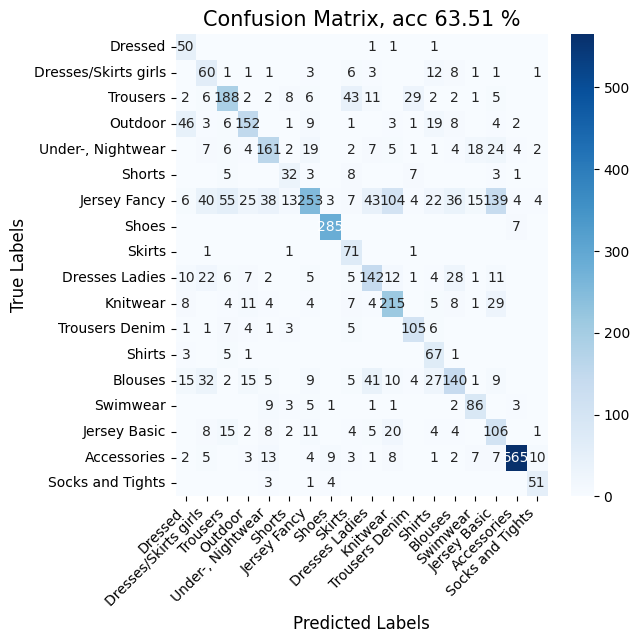

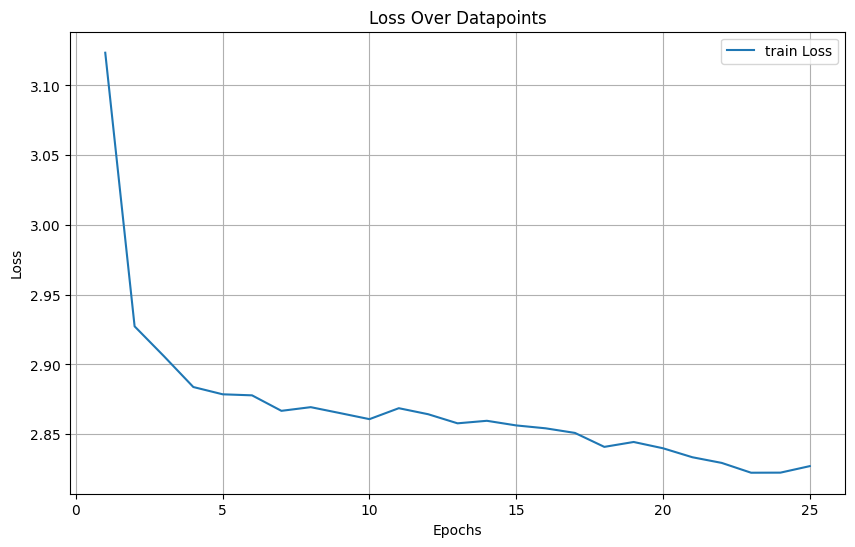

<Figure size 640x480 with 0 Axes>

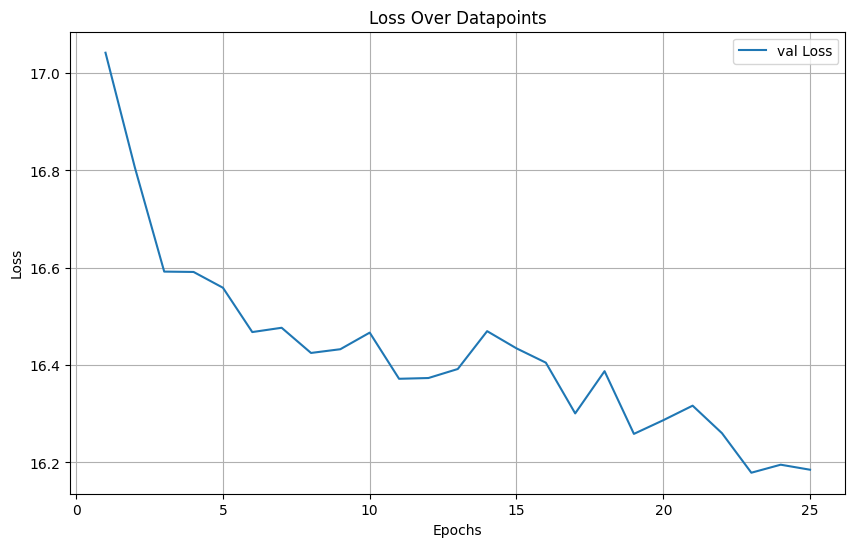

Accuracy for rank configuration [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 256, 256] with lr=0.001, wd=0.001 is 63.51 %


<Figure size 640x480 with 0 Axes>

In [18]:
update()
ranks = [0, 0, 0, 0, 0, 0,0, 0,0, 0, 256, 256]  # Only apply LoRA with rank 64 to the last layer

#ranks = [256, 256, 256, 256, 256, 256, 256, 256,256, 256, 256, 256]  # Only apply LoRA with rank 64 to the last layer
lr = 1e-03
wd = 0.001
epochs_num = 25
lora_layers = []

clip = {'m': copy.deepcopy(model), 'p': processor} # do not load each time
lora_layers = model_functions.apply_lora_to_transformer(clip['m'].text_model.encoder.layers , lora_layers, ranks)
lora_params_attention = model_functions.get_lora_params(clip['m'], print_layer = True)


ft = training.FinetuneCLIP(dataloaders, clip, epochs = epochs_num )
ft.conf = {'epochs': epochs_num, 'balanced':BALANCED}
ft.model_prefix = "lora-cap-5000-3-200-start"

# Initialize LoRA training with current hyperparameters
ft.tt['soft'], ft.tt['LoRA'], ft.tt['image_fc'] = 0, 1 ,0 # Enable LoRA
ft.initialize({'LoRA': lora_params_attention, 'lr': lr, 'weight_decay': wd, 'num_soft':0, 'add':''},
              load=False, file_name=file_name)

ft.count_parameters()
#all_predictions, all_labels, acc = ft.eval(False)

# Train the model
ft.es['pat']=60
ft.train()

# Evaluate the model
all_predictions, all_labels, acc = ft.eval(False)
utils.confussion_matrix(all_labels, all_predictions, list(dataloaders['test'].dataset.class_to_id.keys()), F1=False)
ft.plot_loss_key('train', 'final')
ft.plot_loss_key('val', 'final')

print(f"Accuracy for rank configuration {ranks} with lr={lr}, wd={wd} is {acc:.2f} %")